In [2]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from keras.utils import np_utils
import numpy as np
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Theano backend
from numpy import argmax
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#load in the data set: 
jazz = pd.read_csv("../data/jazz_csv.csv")
classical = pd.read_csv("../data/classical_csv.csv")
country = pd.read_csv("../data/country_csv.csv")
edm = pd.read_csv("../data/edm_csv.csv")
rap = pd.read_csv("../data/rap_csv.csv")
rock = pd.read_csv("../data/rock_csv.csv")

In [4]:
count = 0
features = []
genres = []
dataframes = {1:jazz, 2: classical, 3:country, 4:edm, 5: rap, 6: rock} #map genre dfs to index
#dataframes = {1:jazz, 2: classical, 3:rock, 4:edm, 5: rap } #map genre dfs to index

for genre, dataframe in dataframes.items():
    count = 0
    for ind, row in dataframe.iterrows():
        count+=1
        #features.append([row["acousticness"], row["danceability"], row["energy"],row["loudness"], row["tempo"], row["valence"]])

        features.append([row["acousticness"],row["instrumentalness"], row["key"], row["danceability"], row["energy"],row["loudness"],row["speechiness"], row["tempo"], row["valence"]])
        genres.append(genre)
y = genres
X = features

In [5]:
encoder = LabelEncoder() #use encoder to hot encode the genres to flag the genre in matrix 
encoder.fit(y) 
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y) 
y = dummy_y

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21) #split data 
X_train = [X_train]

In [7]:
model = Sequential() #use a sequential model bc we wanna keep adding layers potentially 
model.add(Dense(256, input_dim=9, activation='relu'))
model.add(Dense(128, activation='relu')) #four dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.add(Dropout(128)) #dropout for overfitting data 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #use loss func for categorical and base on accuracy 

In [8]:
model.fit(X_train, y_train, epochs=120, batch_size=128) #start with a baby amount 

Epoch 1/120
10038/10038 [==============================] - 3s 261us/step - loss: 1.6044 - acc: 0.3507
Epoch 2/120
10038/10038 [==============================] - 1s 121us/step - loss: 1.3426 - acc: 0.4067
Epoch 3/120
10038/10038 [==============================] - 2s 196us/step - loss: 1.2985 - acc: 0.4394
Epoch 4/120
10038/10038 [==============================] - 1s 130us/step - loss: 1.2310 - acc: 0.4711
Epoch 5/120
10038/10038 [==============================] - 2s 152us/step - loss: 1.1524 - acc: 0.5156
Epoch 6/120
10038/10038 [==============================] - 1s 111us/step - loss: 1.0849 - acc: 0.5487
Epoch 7/120
10038/10038 [==============================] - 1s 99us/step - loss: 1.0742 - acc: 0.5435
Epoch 8/120
10038/10038 [==============================] - 1s 97us/step - loss: 1.0445 - acc: 0.5551
Epoch 9/120
10038/10038 [==============================] - 1s 86us/step - loss: 0.9693 - acc: 0.5936
Epoch 10/120
10038/10038 [==============================] - 1s 85us/step - loss: 0.92

10038/10038 [==============================] - 1s 73us/step - loss: 0.6854 - acc: 0.7245
Epoch 82/120
10038/10038 [==============================] - 1s 72us/step - loss: 0.6794 - acc: 0.7357
Epoch 83/120
10038/10038 [==============================] - 1s 70us/step - loss: 0.6791 - acc: 0.7302
Epoch 84/120
10038/10038 [==============================] - 1s 73us/step - loss: 0.6832 - acc: 0.7265
Epoch 85/120
10038/10038 [==============================] - 1s 73us/step - loss: 0.6879 - acc: 0.7293
Epoch 86/120
10038/10038 [==============================] - 1s 112us/step - loss: 0.6656 - acc: 0.7341
Epoch 87/120
10038/10038 [==============================] - 1s 102us/step - loss: 0.6851 - acc: 0.7292
Epoch 88/120
10038/10038 [==============================] - 1s 73us/step - loss: 0.6812 - acc: 0.7311
Epoch 89/120
10038/10038 [==============================] - 1s 75us/step - loss: 0.6646 - acc: 0.7400
Epoch 90/120
10038/10038 [==============================] - 1s 84us/step - loss: 0.6727 - acc

In [9]:
_, accuracy = model.evaluate(X_train, y_train) 
print('Accuracy: %.2f' % (accuracy*100))

10038/10038 [==============================] - 1s 114us/step
Accuracy: 76.32


In [10]:
genres_dict = {0:"jazz", 1: "classical", 2:"country", 3:"edm", 4: "rap", 5: "rock"} #map genre dfs to index

In [11]:
test_y_predictions = model.predict([X_test])

In [12]:
ctr = 0
jazz_ctr, classical_ctr, country_ctr, edm_ctr , rap_ctr , rock_ctr = 0, 0, 0, 0, 0, 0
jazz_total, classical_total, country_total, edm_total, rap_total, rock_total = 0, 0, 0, 0, 0, 0

In [13]:
expected = []
predicted = []
for i in range(len(test_y_predictions)):
    genre_predicted = genres_dict[argmax(test_y_predictions[i])]
    genre_expected = genres_dict[argmax(y_test[i])]
    expected.append(genre_expected)
    predicted.append(genre_predicted)
    print("predicted: ", genre_predicted, "expected: ", genre_expected)
    if genre_expected == 'jazz':
        jazz_total+=1
    elif genre_expected== 'classical':
        classical_total+=1
    elif genre_expected=='country':
        country_total+=1
    elif genre_expected=='edm':
        edm_total+=1
    elif genre_expected== 'rap':
        rap_total+=1
    elif genre_expected== 'rock':
        #print('______________________________')
        rock_total+=1
    if genre_predicted==genre_expected: 
        ctr+=1
        if genre_predicted == 'jazz':
            jazz_ctr+=1
        elif genre_predicted== 'classical':
            classical_ctr+=1
        elif genre_predicted=='country':
            country_ctr+=1
        elif genre_predicted=='edm':
            edm_ctr+=1
        elif genre_predicted== 'rap':
            rap_ctr+=1
        elif genre_predicted == 'rock':
            #print('yes')
            rock_ctr+=1

predicted:  edm expected:  edm
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  edm expected:  country
predicted:  rap expected:  rap
predicted:  rock expected:  country
predicted:  edm expected:  edm
predicted:  jazz expected:  jazz
predicted:  classical expected:  classical
predicted:  rock expected:  edm
predicted:  edm expected:  edm
predicted:  jazz expected:  country
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  edm expected:  rock
predicted:  classical expected:  classical
predicted:  edm expected:  rap
predicted:  rock expected:  rock
predicted:  country expected:  rap
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  edm expected:  rap
predicted:  country expected:  rap
predicted:  rock expected:  rock
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicte

predicted:  rock expected:  rock
predicted:  country expected:  rock
predicted:  country expected:  jazz
predicted:  rap expected:  rap
predicted:  rock expected:  rock
predicted:  country expected:  country
predicted:  edm expected:  edm
predicted:  country expected:  country
predicted:  edm expected:  edm
predicted:  jazz expected:  jazz
predicted:  classical expected:  jazz
predicted:  edm expected:  edm
predicted:  country expected:  country
predicted:  rock expected:  edm
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  jazz expected:  classical
predicted:  classical expected:  classical
predicted:  edm expected:  edm
predicted:  classical expected:  classical
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  country expected:  jazz
predicted:  jazz expected:  jazz
predicted:  jazz expected:  jazz
predicted:  edm expected:  edm
predicted:  rock expected:  rock
predicted:  jazz expected:  classical
predicted: 

predicted:  jazz expected:  jazz
predicted:  country expected:  rap
predicted:  rap expected:  rock
predicted:  jazz expected:  jazz
predicted:  rock expected:  country
predicted:  classical expected:  classical
predicted:  classical expected:  classical
predicted:  edm expected:  edm
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  rap expected:  edm
predicted:  rock expected:  rock
predicted:  country expected:  country
predicted:  rock expected:  country
predicted:  edm expected:  edm
predicted:  edm expected:  edm
predicted:  jazz expected:  jazz
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  rock expected:  rock
predicted:  jazz expected:  jazz
predicted:  rock expected:  rock
predicted:  edm expected:  edm
predicted:  rock expected:  rock
predicted:  jazz expected:  country
predicted:  country expected:  rock
predicted:  jazz expected:  jazz
predicted:  rock expected:  rock
predicted:  jazz expect

predicted:  edm expected:  edm
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  rock expected:  rock
predicted:  jazz expected:  rock
predicted:  rock expected:  country
predicted:  jazz expected:  country
predicted:  classical expected:  classical
predicted:  rock expected:  rock
predicted:  rock expected:  country
predicted:  rap expected:  edm
predicted:  jazz expected:  jazz
predicted:  rap expected:  rap
predicted:  country expected:  rock
predicted:  edm expected:  edm
predicted:  rock expected:  rock
predicted:  classical expected:  classical
predicted:  edm expected:  edm
predicted:  rap expected:  edm
predicted:  jazz expected:  jazz
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predicted:  rock expected:  rock
predicted:  rock expected:  rock
predicted:  edm expected:  edm
predicted:  edm expected:  edm
predicted:  country expected:  edm
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predi

predicted:  rap expected:  rap
predicted:  rock expected:  rock
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  rap expected:  rap
predicted:  edm expected:  edm
predicted:  rock expected:  rock
predicted:  country expected:  rap
predicted:  classical expected:  classical
predicted:  classical expected:  jazz
predicted:  edm expected:  country
predicted:  edm expected:  edm
predicted:  country expected:  jazz
predicted:  jazz expected:  classical
predicted:  rap expected:  rap
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predicted:  jazz expected:  classical
predicted:  edm expected:  edm
predicted:  edm expected:  edm
predicted:  edm expected:  edm
predicted:  classical expected:  classical
predicted:  rock expected:  rock
predicted:  country expected:  country
predicted:  jazz expected:  jazz
predicted:  jazz expected:  rap
predicted:  rap expecte

predicted:  classical expected:  classical
predicted:  rap expected:  rap
predicted:  classical expected:  jazz
predicted:  country expected:  edm
predicted:  country expected:  country
predicted:  jazz expected:  jazz
predicted:  classical expected:  classical
predicted:  country expected:  rock
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  edm expected:  edm
predicted:  rap expected:  country
predicted:  classical expected:  classical
predicted:  rock expected:  rock
predicted:  rap expected:  rap
predicted:  country expected:  country
predicted:  edm expected:  country
predicted:  country expected:  country
predicted:  country expected:  country
predicted:  jazz expected:  jazz
predicted:  edm expected:  edm
predicted:  classical expected:  classical
predicted:  classical expected:  classical
predicted:  jazz expected:  rock
predicted:  rock expected:  rap
predicted:  rap expected:  rap
predicted:  country expected:  country
predicted:

predicted:  classical expected:  classical
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  edm expected:  rap
predicted:  rock expected:  rock
predicted:  rock expected:  rock
predicted:  rock expected:  rock
predicted:  rap expected:  rap
predicted:  jazz expected:  jazz
predicted:  jazz expected:  classical
predicted:  country expected:  country
predicted:  edm expected:  rap
predicted:  edm expected:  edm
predicted:  edm expected:  edm
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  rap expected:  edm
predicted:  rap expected:  rap
predicted:  rock expected:  country
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predicted:  country expected:  country
predicted:  country expected:  country
predicted:  rap expected:  rap
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predicted:  rock expec

predicted:  rock expected:  rock
predicted:  jazz expected:  classical
predicted:  edm expected:  edm
predicted:  jazz expected:  jazz
predicted:  rock expected:  rock
predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  rock expected:  rock
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  rap expected:  rock
predicted:  edm expected:  edm
predicted:  edm expected:  edm
predicted:  jazz expected:  jazz
predicted:  country expected:  country
predicted:  rap expected:  rap
predicted:  country expected:  rock
predicted:  jazz expected:  jazz
predicted:  rock expected:  country
predicted:  classical expected:  classical
predicted:  classical expected:  classical
predicted:  rock expected:  jazz
predicted:  rap expected:  rock
predicted:  country expected:  country
predicted:  classical expected:  classical
predicted:  jazz expected:  classical
predicted:  jazz expected:  jazz
predicted:  country expected:  coun

predicted:  classical expected:  classical
predicted:  jazz expected:  jazz
predicted:  classical expected:  jazz
predicted:  jazz expected:  jazz
predicted:  jazz expected:  jazz
predicted:  edm expected:  edm
predicted:  country expected:  rock
predicted:  rock expected:  rock
predicted:  rock expected:  country
predicted:  jazz expected:  jazz
predicted:  country expected:  rock
predicted:  rap expected:  rap
predicted:  jazz expected:  jazz
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  country expected:  country
predicted:  jazz expected:  jazz
predicted:  jazz expected:  edm
predicted:  rap expected:  rap
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  rock expected:  rock
predicted:  jazz expected:  rock
predicted:  rock expected:  rock
predicted:  country expected:  edm
predicted:  country expected:  country
predicted:  edm expected:  edm
predicted:  rock expected:  rock
predicted:  cou

predicted:  classical expected:  classical
predicted:  rap expected:  rap
predicted:  rock expected:  rock
predicted:  classical expected:  classical
predicted:  classical expected:  classical
predicted:  classical expected:  classical
predicted:  country expected:  country
predicted:  jazz expected:  jazz
predicted:  country expected:  rap
predicted:  rock expected:  rock
predicted:  rap expected:  rap
predicted:  rock expected:  rock
predicted:  classical expected:  jazz
predicted:  jazz expected:  jazz
predicted:  jazz expected:  classical
predicted:  rap expected:  rap
predicted:  rock expected:  rock
predicted:  rap expected:  rap
predicted:  rap expected:  rap
predicted:  country expected:  country
predicted:  jazz expected:  jazz
predicted:  jazz expected:  jazz
predicted:  rock expected:  rap
predicted:  jazz expected:  country
predicted:  rock expected:  country
predicted:  rap expected:  rap
predicted:  jazz expected:  jazz
predicted:  rap expected:  rap
predicted:  jazz expe

In [14]:
print("jazz acc: ", jazz_ctr/jazz_total)
print("country acc: ", country_ctr/country_total)
print("rock acc: ", rock_ctr/rock_total)
print("rap acc: ", rap_ctr/rap_total)
print("classical acc: ", classical_ctr/classical_total)
print("edm acc: ", edm_ctr/edm_total)
print("overall acc: ", ctr/len(test_y_predictions))

jazz acc:  0.7326086956521739
country acc:  0.7316455696202532
rock acc:  0.5965770171149144
rap acc:  0.7835820895522388
classical acc:  0.9080459770114943
edm acc:  0.7237163814180929
overall acc:  0.747410358565737


In [15]:
#creating a confusion matrix to visualize the results
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Genre')
    plt.xlabel('Predicted Genre')
    plt.tight_layout()

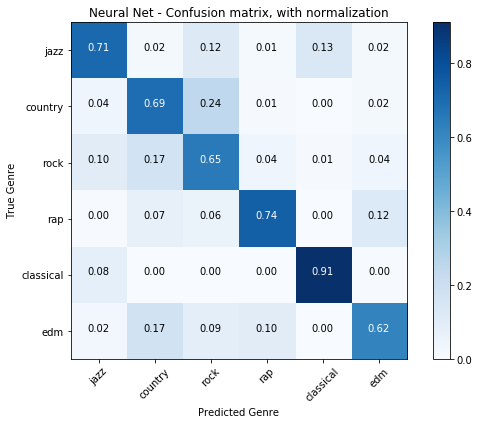

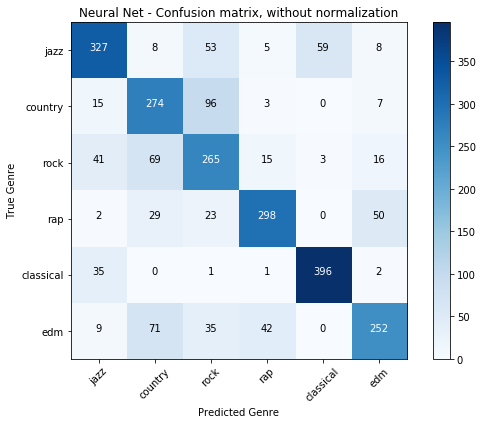

In [45]:
cnf_matrix = confusion_matrix(expected, predicted, labels=['jazz', 'country', 'rock', 'rap', 'classical', 'edm'])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['jazz', 'country', 'rock', 'rap', 'classical', 'edm'],
                      title='Neural Net - Confusion matrix, with normalization')
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['jazz', 'country', 'rock', 'rap', 'classical', 'edm'],normalize= False,
                      title='Neural Net - Confusion matrix, without normalization')